In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

def generate_large_synthetic_dataset(n_samples=4500):
    np.random.seed(42)

    # Helper function to add controlled noise
    def add_noise(base_values, noise_level=0.1):
        return base_values + np.random.normal(0, noise_level, len(base_values))

    # Generate base student profiles
    profiles = {
        'high_risk': int(n_samples * 0.25),    # 25% high risk students
        'medium_risk': int(n_samples * 0.35),   # 35% medium risk students
        'low_risk': int(n_samples * 0.40)       # 40% low risk students
    }

    data_list = []

    # Generate data for each profile
    for profile, count in profiles.items():
        if profile == 'high_risk':
            # High risk students
            data = {
                'Age': np.random.normal(17, 1.2, count).clip(15, 20).round(),
                'GPA': add_noise(np.random.normal(2.1, 0.4, count).clip(0, 3.5)),
                'Attendance_Rate': add_noise(np.random.beta(2, 5, count) * 100).clip(30, 85),
                'Study_Hours_Per_Week': add_noise(np.random.normal(4, 2, count).clip(0, 15)),
                'Homework_Submission_Rate': add_noise(np.random.beta(2, 4, count) * 100).clip(20, 80),
                'Distance_From_School': np.random.exponential(8, count).clip(2, 25),
                'Family_Size': np.random.poisson(4, count) + 1,
                'Disciplinary_Actions': np.random.poisson(3, count),
                'Teacher_Evaluation_Score': add_noise(np.random.normal(5, 1.5, count).clip(2, 8)),
                'Parent_Teacher_Meetings_Attended': np.random.poisson(1, count),
                'Extracurricular_Participation': np.random.poisson(0.5, count),
                'Dropout_Risk': np.ones(count)
            }
        elif profile == 'medium_risk':
            # Medium risk students
            data = {
                'Age': np.random.normal(16.5, 1.0, count).clip(15, 19).round(),
                'GPA': add_noise(np.random.normal(2.8, 0.3, count).clip(2.0, 3.8)),
                'Attendance_Rate': add_noise(np.random.beta(5, 2, count) * 100).clip(60, 95),
                'Study_Hours_Per_Week': add_noise(np.random.normal(8, 3, count).clip(2, 20)),
                'Homework_Submission_Rate': add_noise(np.random.beta(4, 2, count) * 100).clip(50, 90),
                'Distance_From_School': np.random.exponential(5, count).clip(1, 20),
                'Family_Size': np.random.poisson(3, count) + 1,
                'Disciplinary_Actions': np.random.poisson(1, count),
                'Teacher_Evaluation_Score': add_noise(np.random.normal(7, 1.0, count).clip(5, 9)),
                'Parent_Teacher_Meetings_Attended': np.random.poisson(2, count),
                'Extracurricular_Participation': np.random.poisson(1, count),
                'Dropout_Risk': np.zeros(count)
            }
        else:
            # Low risk students
            data = {
                'Age': np.random.normal(16, 0.8, count).clip(15, 18).round(),
                'GPA': add_noise(np.random.normal(3.5, 0.3, count).clip(2.8, 4.0)),
                'Attendance_Rate': add_noise(np.random.beta(8, 2, count) * 100).clip(80, 100),
                'Study_Hours_Per_Week': add_noise(np.random.normal(15, 4, count).clip(5, 30)),
                'Homework_Submission_Rate': add_noise(np.random.beta(8, 2, count) * 100).clip(75, 100),
                'Distance_From_School': np.random.exponential(3, count).clip(0.5, 15),
                'Family_Size': np.random.poisson(2, count) + 1,
                'Disciplinary_Actions': np.random.poisson(0.2, count),
                'Teacher_Evaluation_Score': add_noise(np.random.normal(8.5, 0.8, count).clip(7, 10)),
                'Parent_Teacher_Meetings_Attended': np.random.poisson(3, count),
                'Extracurricular_Participation': np.random.poisson(2, count),
                'Dropout_Risk': np.zeros(count)
            }

        # Add categorical variables
        data['Gender'] = np.random.choice(['M', 'F'], count)
        data['Health_Status'] = np.random.choice(
            ['Good', 'Fair', 'Poor'],
            count,
            p=[0.5, 0.3, 0.2] if profile == 'high_risk' else [0.7, 0.2, 0.1]
        )
        data['School_Transportation'] = np.random.choice(
            ['Yes', 'No'],
            count,
            p=[0.6, 0.4] if profile == 'high_risk' else [0.8, 0.2]
        )
        data['Part_Time_Job'] = np.random.choice(
            ['Yes', 'No'],
            count,
            p=[0.4, 0.6] if profile == 'high_risk' else [0.2, 0.8]
        )
        data['Special_Education_Support'] = np.random.choice(
            ['Yes', 'No'],
            count,
            p=[0.2, 0.8] if profile == 'high_risk' else [0.1, 0.9]
        )
        data['Online_Learning_Participation'] = np.random.choice(
            ['High', 'Medium', 'Low'],
            count,
            p=[0.2, 0.3, 0.5] if profile == 'high_risk' else [0.5, 0.3, 0.2]
        )
        data['School_Facilities_Access'] = np.random.choice(
            ['Full', 'Limited', 'Minimal'],
            count,
            p=[0.5, 0.3, 0.2] if profile == 'high_risk' else [0.8, 0.15, 0.05]
        )
        data['Parent_Education'] = np.random.choice(
            ['Primary', 'Secondary', 'Bachelor', 'Master'],
            count,
            p=[0.4, 0.3, 0.2, 0.1] if profile == 'high_risk' else [0.1, 0.3, 0.4, 0.2]
        )
        data['Family_Income'] = np.random.choice(
            ['Low', 'Middle', 'High'],
            count,
            p=[0.5, 0.3, 0.2] if profile == 'high_risk' else [0.2, 0.5, 0.3]
        )
        data['Parent_Occupation'] = np.random.choice(
            ['Government', 'Private', 'Self-employed', 'Unemployed'],
            count,
            p=[0.1, 0.3, 0.3, 0.3] if profile == 'high_risk' else [0.3, 0.4, 0.2, 0.1]
        )

        # Add to data list
        data_list.append(pd.DataFrame(data))

    # Combine all profiles
    df = pd.concat(data_list, ignore_index=True)

    # Add Student_ID
    df['Student_ID'] = range(1, len(df) + 1)

    # Shuffle the dataset
    return df.sample(frac=1, random_state=42).reset_index(drop=True)

# Generate the dataset
df = generate_large_synthetic_dataset(4500)

# Prepare for modeling
X = df.drop(['Student_ID', 'Dropout_Risk'], axis=1)
y = df['Dropout_Risk']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nDataset Properties:")
print(f"Total samples: {len(df)}")
print(f"Dropout rate: {(df['Dropout_Risk'].mean() * 100):.1f}%")
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Save the dataset
df.to_csv('large_student_dropout_dataset.csv', index=False)

# Print feature distributions
print("\nFeature Distributions:")
for col in ['GPA', 'Attendance_Rate', 'Study_Hours_Per_Week', 'Homework_Submission_Rate']:
    print(f"\n{col}:")
    print(df[col].describe().round(2))


Dataset Properties:
Total samples: 4500
Dropout rate: 25.0%

Model Performance:
Accuracy: 0.999

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       666
         1.0       1.00      1.00      1.00       234

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900


Feature Distributions:

GPA:
count    4500.00
mean        2.91
std         0.65
min         0.80
25%         2.45
50%         2.95
75%         3.42
max         4.28
Name: GPA, dtype: float64

Attendance_Rate:
count    4500.00
mean       69.06
std        21.56
min        30.00
25%        60.00
50%        80.00
75%        84.65
max        99.51
Name: Attendance_Rate, dtype: float64

Study_Hours_Per_Week:
count    4500.00
mean        9.83
std         5.50
min        -0.24
25%         5.31
50%         9.07
75%        13.97
max        29.43


Import Liabrary

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Load the dataset

In [ ]:
data = pd.read_csv('/content/large_student_dropout_dataset(1).csv')


In [ ]:
# Select relevant features and target variable
features = ['GPA', 'Attendance_Rate', 'Study_Hours_Per_Week', 'Homework_Submission_Rate', 'Disciplinary_Actions']
X = data[features]
y = data['Dropout_Risk']  # Assuming Dropout_Risk is already binary (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = model.predict(dtest)
predictions = [1 if pred > 0.5 else 0 for pred in preds]

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.78%


In [ ]:
def get_user_input():
    user_data = {
        'GPA': float(input("Enter GPA: ")),
        'Attendance_Rate': float(input("Enter Attendance Rate (%): ")),
        'Study_Hours_Per_Week': float(input("Enter Study Hours Per Week: ")),
        'Homework_Submission_Rate': float(input("Enter Homework Submission Rate (%): ")),
        'Disciplinary_Actions': int(input("Enter Number of Disciplinary Actions: "))
    }

    return pd.DataFrame([user_data])

user_input_df = get_user_input()
user_input_scaled = scaler.transform(user_input_df)  # Scale user input using the same scaler

user_dmatrix = xgb.DMatrix(user_input_scaled)
user_prediction = model.predict(user_dmatrix)

if user_prediction[0] > 0.5:
    print("The user is at risk of dropping out.")
else:
    print("The user is not at risk of dropping out.")

Enter GPA: 2
Enter Attendance Rate (%): 45
Enter Study Hours Per Week: 14
Enter Homework Submission Rate (%): 85
Enter Number of Disciplinary Actions: 12
The user is at risk of dropping out.


In [ ]:
# Function to get user input and predict dropout risk
def predict_dropout_risk():
    user_data = {
        'GPA': float(input("Enter GPA: ")),
        'Attendance_Rate': float(input("Enter Attendance Rate (%): ")),
        'Study_Hours_Per_Week': float(input("Enter Study Hours Per Week: ")),
        'Homework_Submission_Rate': float(input("Enter Homework Submission Rate (%): ")),
        'Disciplinary_Actions': int(input("Enter Number of Disciplinary Actions: "))
    }

    user_df = pd.DataFrame([user_data])
    user_scaled = scaler.transform(user_df)  # Scale user input using the same scaler

    # Make prediction
    user_dmatrix = xgb.DMatrix(user_scaled)
    prediction = model.predict(user_dmatrix)

    # Determine dropout risk based on prediction threshold
    risk_level = "At Risk of Dropping Out" if prediction[0] > 0.5 else "Not At Risk of Dropping Out"

    print(f"Prediction: {risk_level}")

    # Visualization of input features and prediction result
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(user_data.keys()), y=list(user_data.values()))
    plt.title('User Input Features')
    plt.ylabel('Values')
    plt.xlabel('Features')
    plt.axhline(y=0.5 if prediction[0] > 0.5 else 0.0, color='r', linestyle='--', label='Risk Threshold')
    plt.legend()
    plt.show()

# Call the function to get user input and predict dropout risk
predict_dropout_risk()

# Visualization of overall dataset for context (optional)
plt.figure(figsize=(12, 8))
sns.pairplot(data[features + ['Dropout_Risk']], hue='Dropout_Risk', palette='coolwarm')
plt.title('Pair Plot of Selected Features with Dropout Risk')
plt.show()



KeyboardInterrupt: Interrupted by user

<ipython-input-13-ab370f1b718d>:65: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


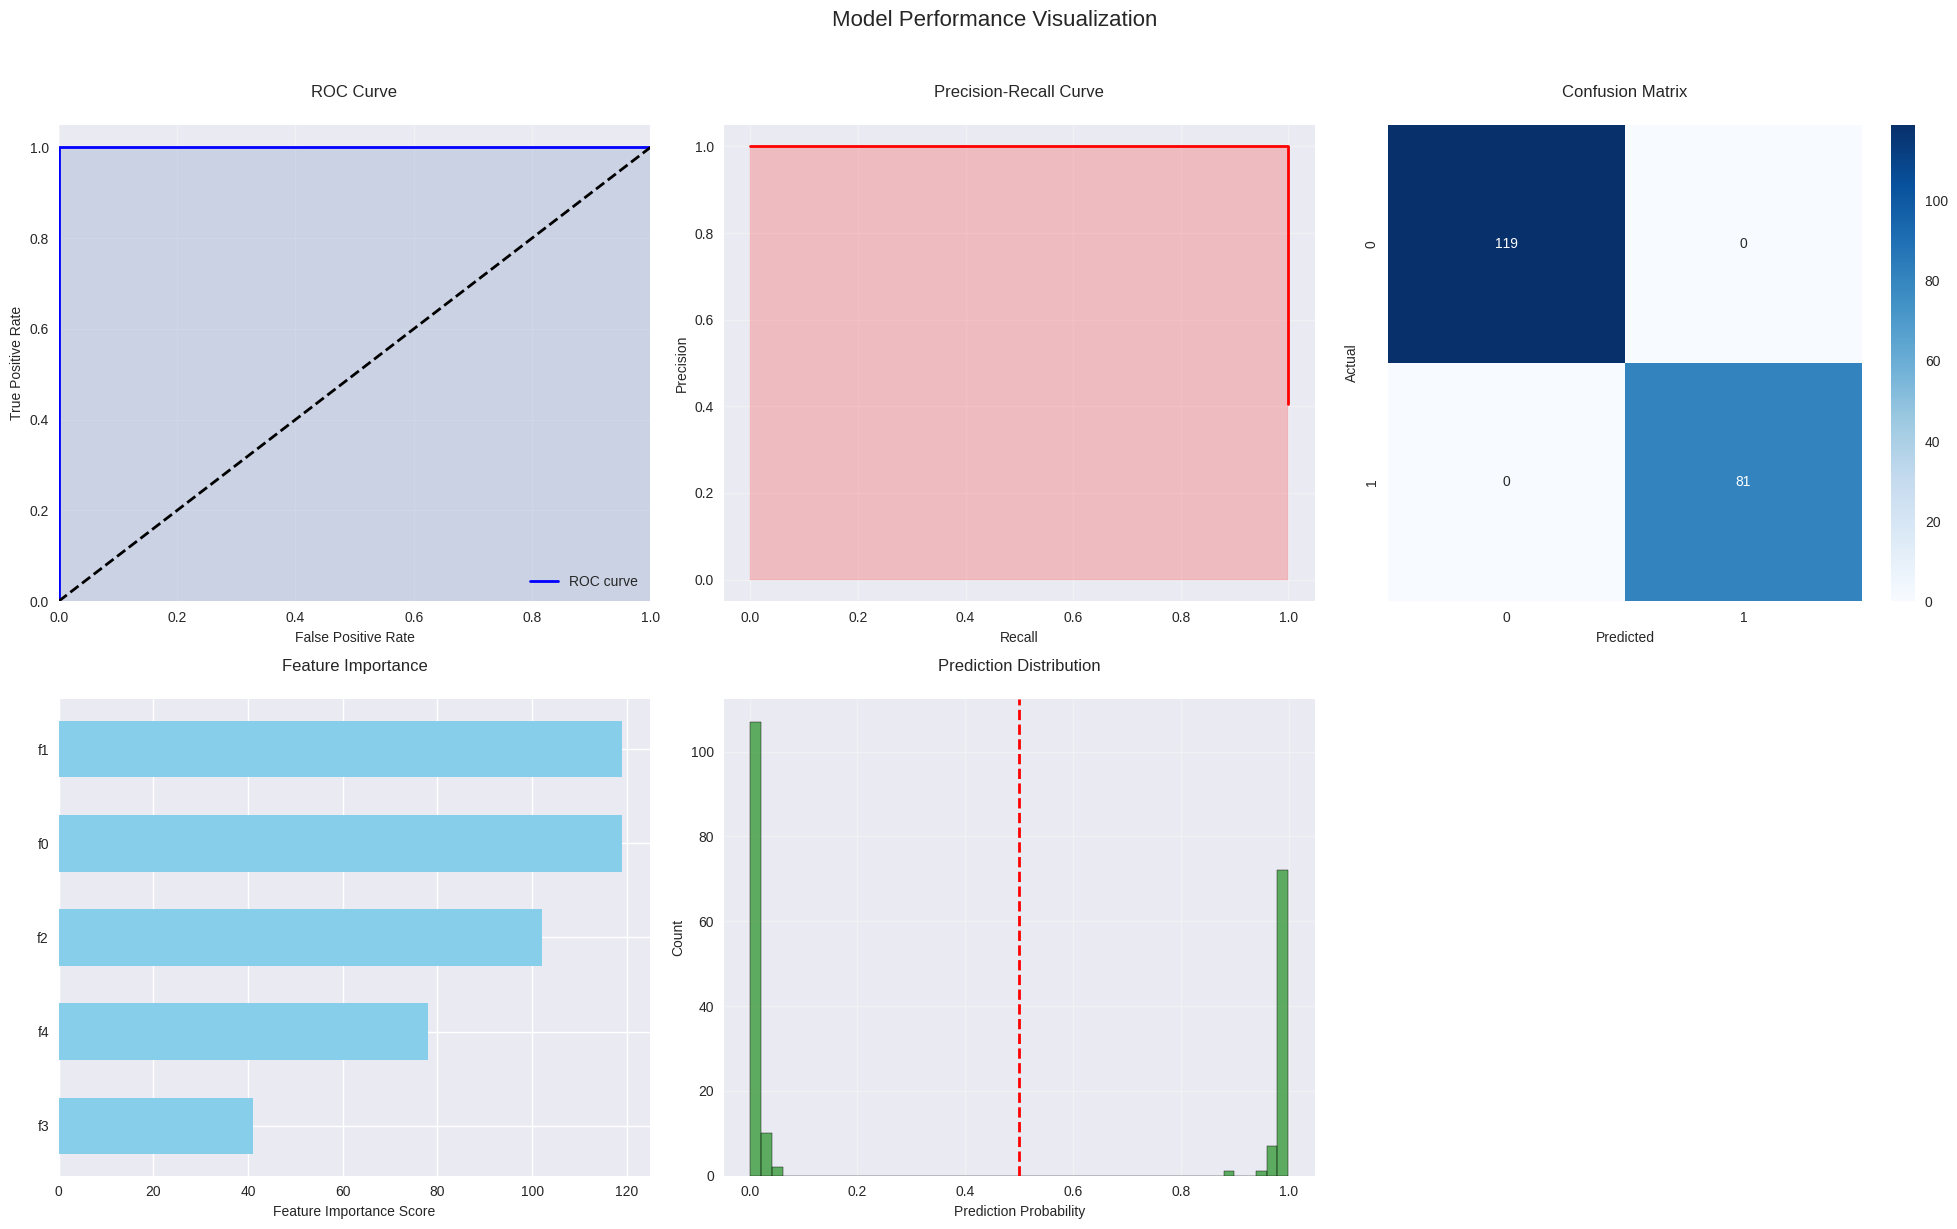

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_samples = 1000

# Create sample dataset
data = pd.DataFrame({
    'GPA': np.random.uniform(2.0, 4.0, n_samples),
    'Attendance_Rate': np.random.uniform(60, 100, n_samples),
    'Study_Hours_Per_Week': np.random.uniform(0, 40, n_samples),
    'Homework_Submission_Rate': np.random.uniform(50, 100, n_samples),
    'Disciplinary_Actions': np.random.randint(0, 5, n_samples)
})

# Create target variable
data['Dropout_Risk'] = (
    (data['GPA'] < 2.5) &
    (data['Attendance_Rate'] < 80) &
    (data['Study_Hours_Per_Week'] < 20) |
    (data['Disciplinary_Actions'] > 2)
).astype(int)

# Prepare data
X = data.drop('Dropout_Risk', axis=1)
y = data['Dropout_Risk']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create DMatrix and train model
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

model = xgb.train(params, dtrain, num_boost_round=100)

# Get predictions
preds = model.predict(dtest)
predictions = [1 if pred > 0.5 else 0 for pred in preds]

def create_performance_graphs():
    """
    Create and display comprehensive model performance visualizations
    """
    # Set up the plotting style and figure
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(20, 12))

    # 1. ROC Curve
    plt.subplot(2, 3, 1)
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, 'b-', linewidth=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.fill_between(fpr, tpr, alpha=0.2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('ROC Curve', fontsize=12, pad=20)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)

    # 2. Precision-Recall Curve
    plt.subplot(2, 3, 2)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    plt.plot(recall, precision, 'r-', linewidth=2)
    plt.fill_between(recall, precision, alpha=0.2, color='red')
    plt.xlabel('Recall', fontsize=10)
    plt.ylabel('Precision', fontsize=10)
    plt.title('Precision-Recall Curve', fontsize=12, pad=20)
    plt.grid(True, alpha=0.3)

    # 3. Confusion Matrix
    plt.subplot(2, 3, 3)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.title('Confusion Matrix', fontsize=12, pad=20)

    # 4. Feature Importance
    plt.subplot(2, 3, 4)
    importance_scores = model.get_score(importance_type='weight')
    features = list(importance_scores.keys())
    scores = list(importance_scores.values())

    # Sort features by importance
    sorted_idx = np.argsort(scores)
    features = [features[i] for i in sorted_idx]
    scores = [scores[i] for i in sorted_idx]

    y_pos = np.arange(len(features))
    plt.barh(y_pos, scores, height=0.6, color='skyblue')
    plt.yticks(y_pos, features, fontsize=10)
    plt.xlabel('Feature Importance Score', fontsize=10)
    plt.title('Feature Importance', fontsize=12, pad=20)

    # 5. Prediction Distribution
    plt.subplot(2, 3, 5)
    sns.histplot(data=preds, bins=50, color='green', alpha=0.6)
    plt.axvline(x=0.5, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Prediction Probability', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Prediction Distribution', fontsize=12, pad=20)
    plt.grid(True, alpha=0.3)

    # Add super title
    plt.suptitle('Model Performance Visualization', fontsize=16, y=1.02)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Run the visualization
if __name__ == "__main__":
    create_performance_graphs()

Accuracy: 99.78%


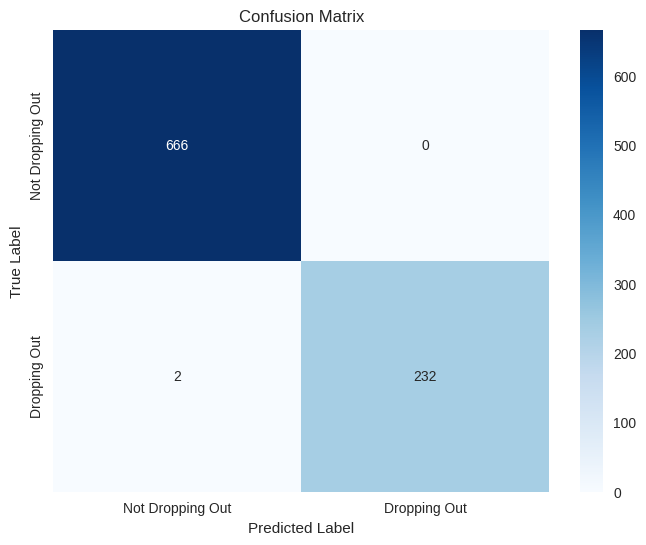

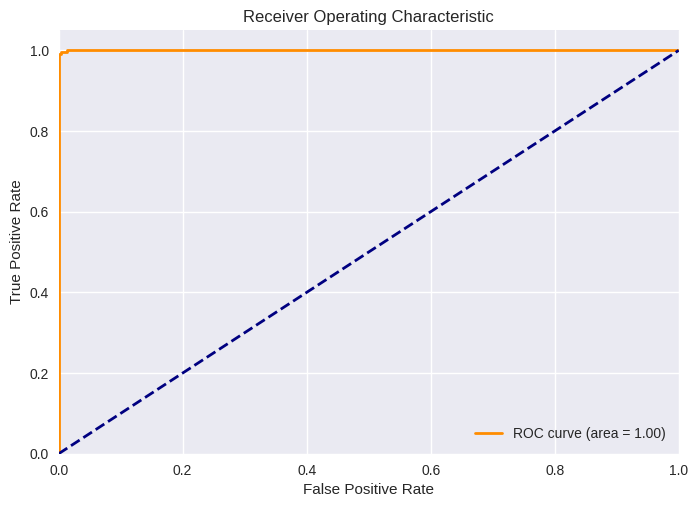

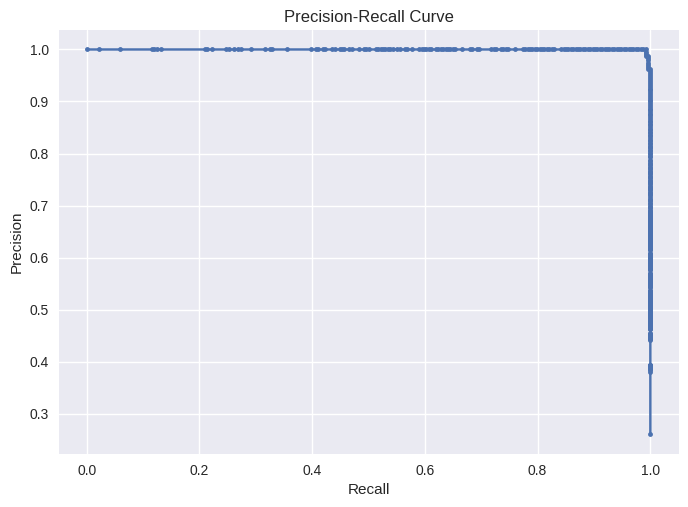

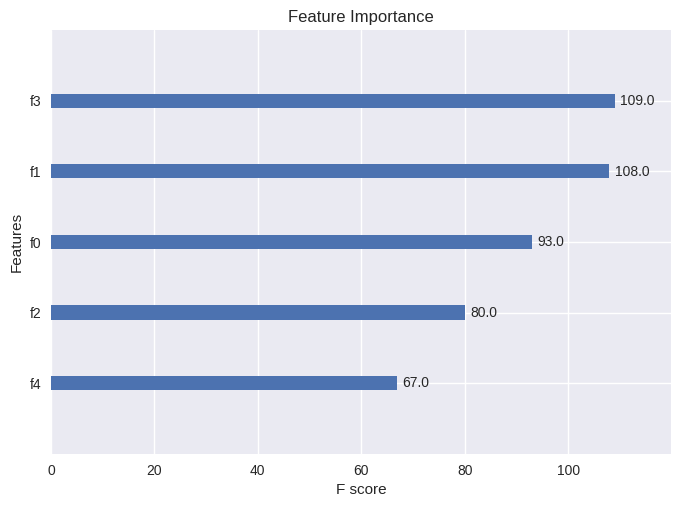

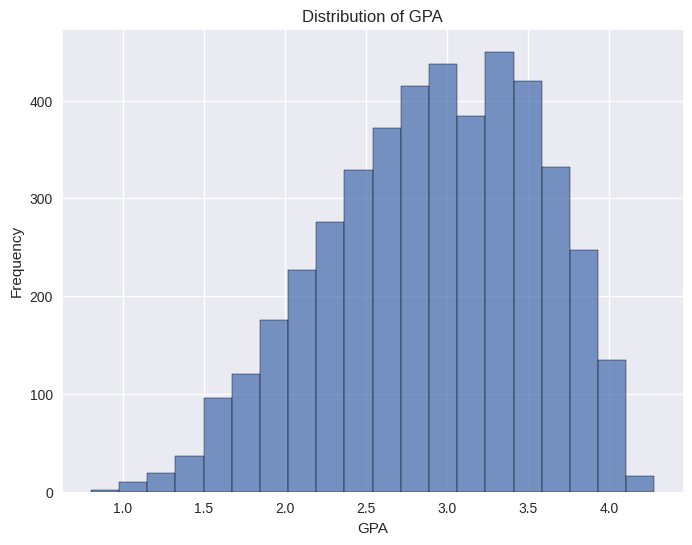

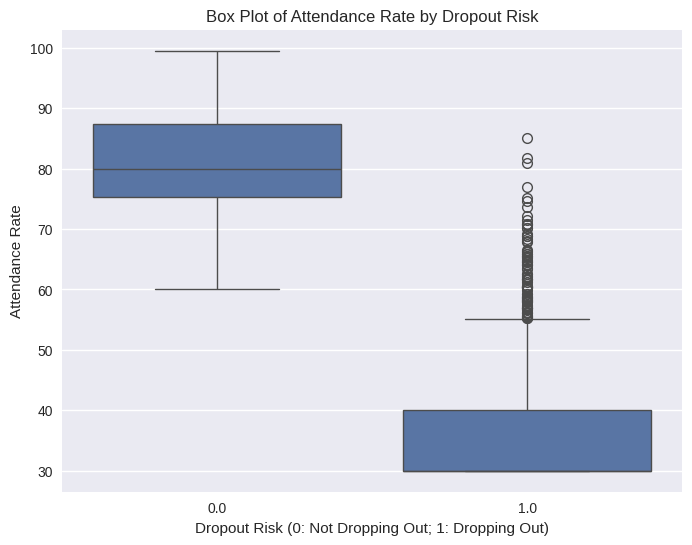

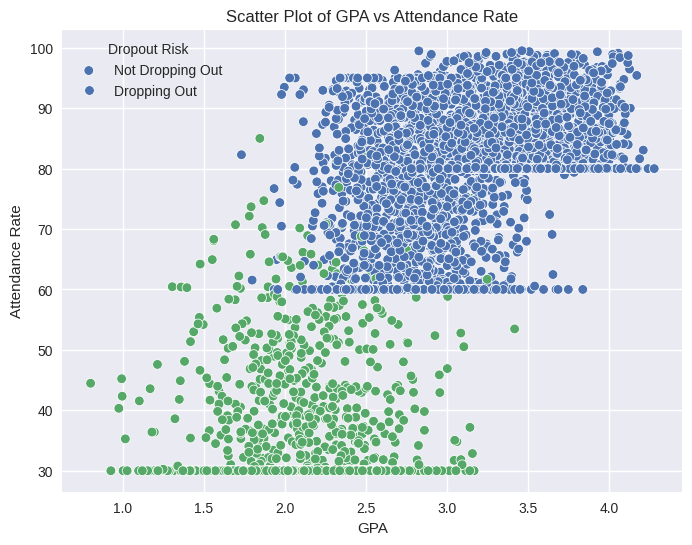

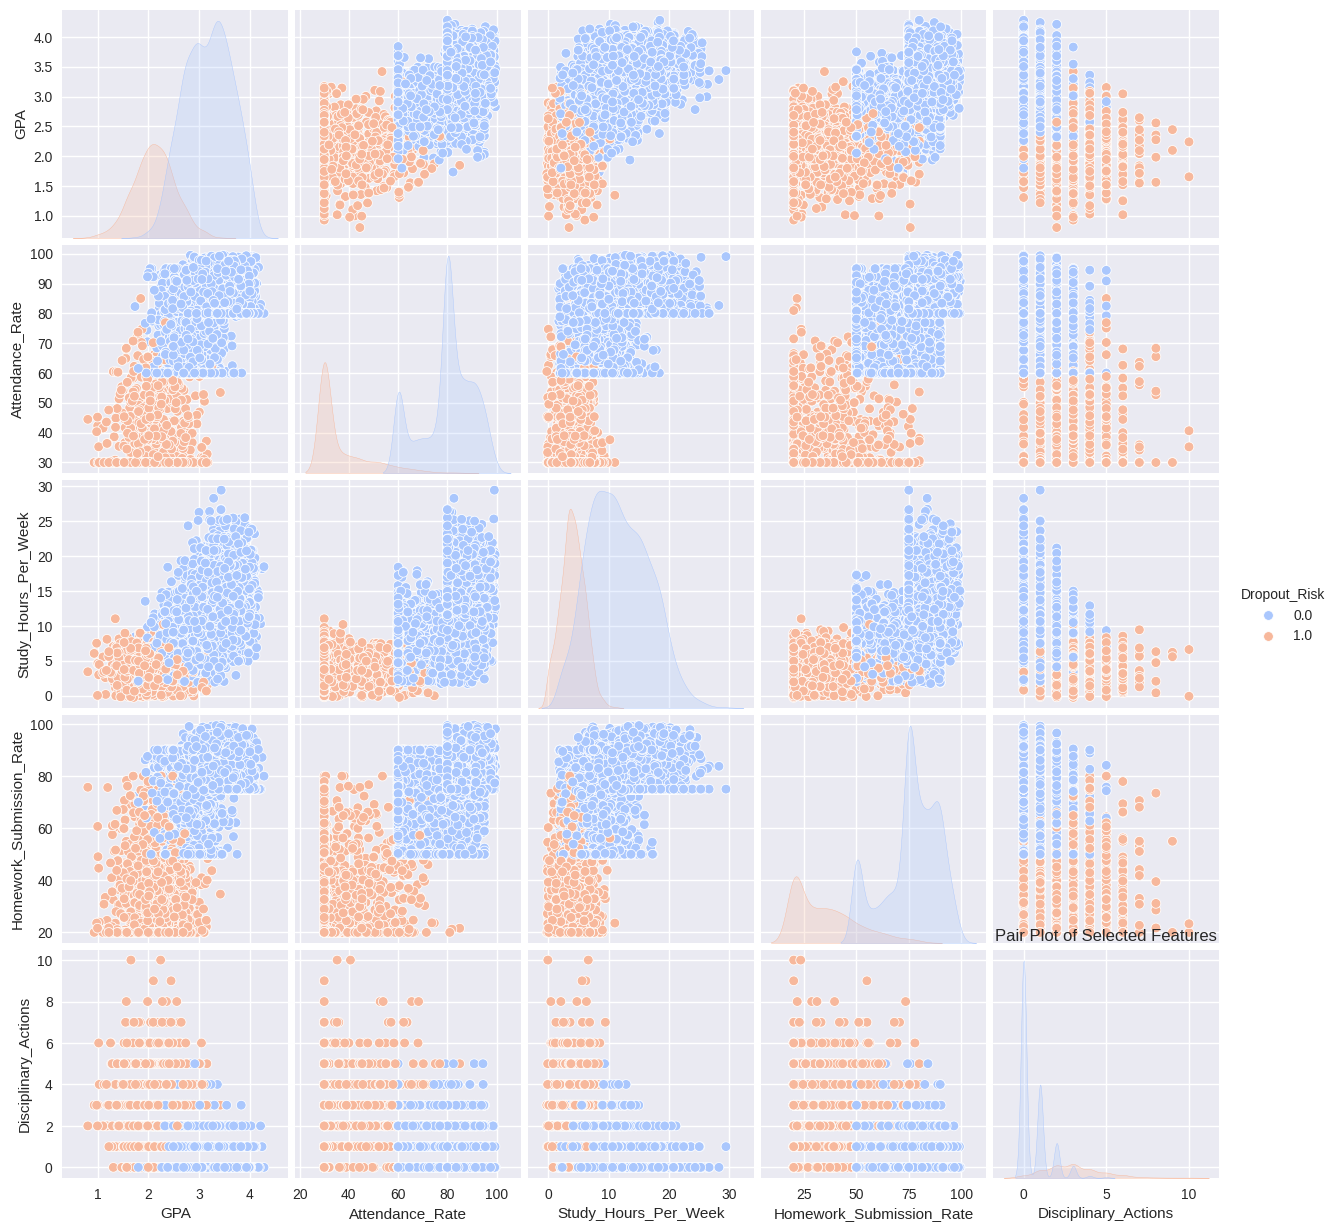

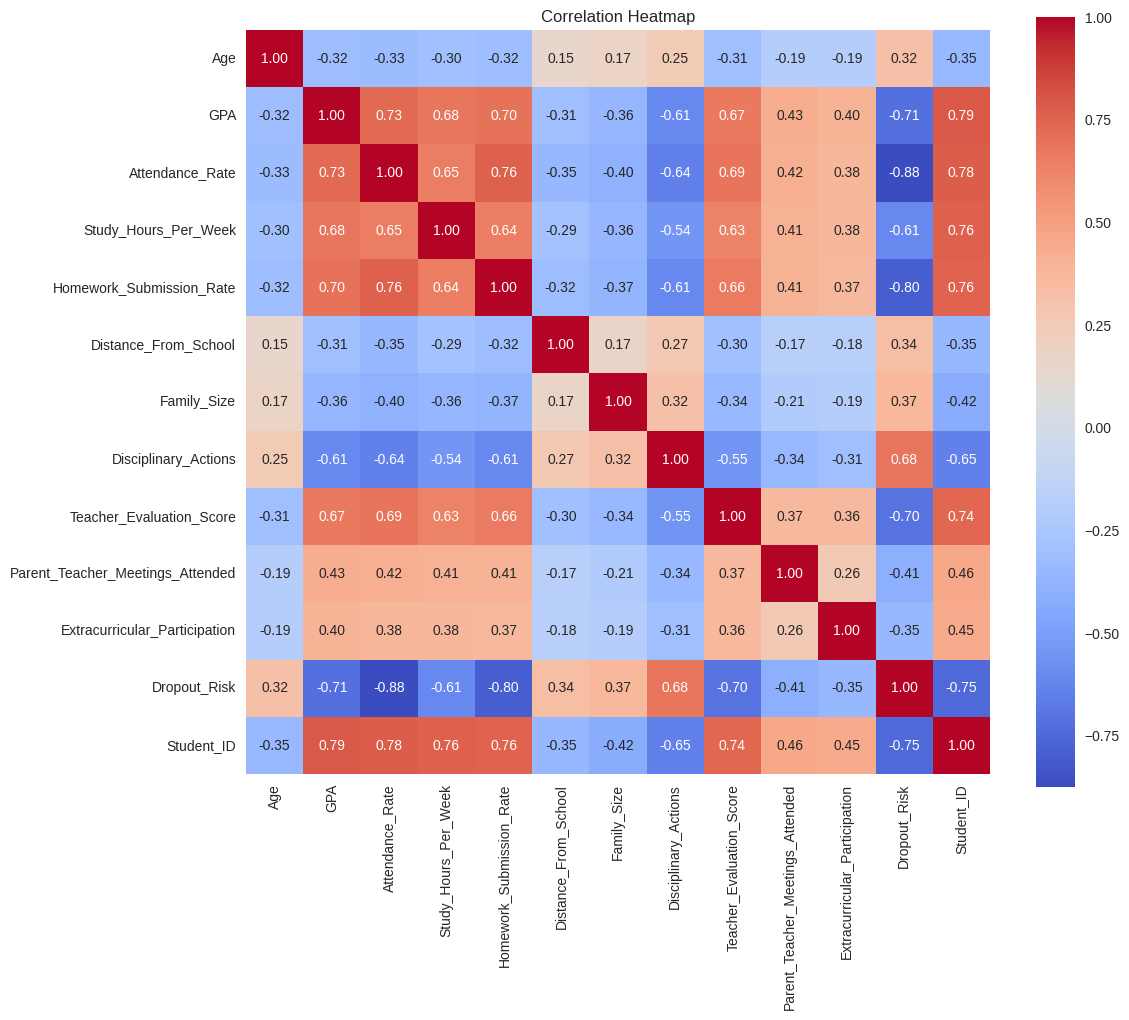

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('large_student_dropout_dataset.csv')

# Select relevant features and target variable
features = ['GPA', 'Attendance_Rate', 'Study_Hours_Per_Week', 'Homework_Submission_Rate', 'Disciplinary_Actions']
X = data[features]
y = data['Dropout_Risk']  # Assuming Dropout_Risk is already binary (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = model.predict(dtest)
predictions = [1 if pred > 0.5 else 0 for pred in preds]

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 1. Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Dropping Out', 'Dropping Out'], yticklabels=['Not Dropping Out', 'Dropping Out'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 4. Feature Importance Plot
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()



# 6. Histogram of GPA
plt.figure(figsize=(8, 6))
sns.histplot(data['GPA'], bins=20)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

# 7. Box Plot of Attendance Rate by Dropout Risk
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dropout_Risk', y='Attendance_Rate', data=data)
plt.title('Box Plot of Attendance Rate by Dropout Risk')
plt.xlabel('Dropout Risk (0: Not Dropping Out; 1: Dropping Out)')
plt.ylabel('Attendance Rate')
plt.show()

# 8. Scatter Plot of GPA vs Attendance Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GPA', y='Attendance_Rate', hue='Dropout_Risk', data=data)
plt.title('Scatter Plot of GPA vs Attendance Rate')
plt.xlabel('GPA')
plt.ylabel('Attendance Rate')
plt.legend(title='Dropout Risk', loc='upper left', labels=['Not Dropping Out', 'Dropping Out'])
plt.show()

# 9. Pair Plot of Selected Features
sns.pairplot(data[features + ['Dropout_Risk']], hue='Dropout_Risk', palette='coolwarm')
plt.title('Pair Plot of Selected Features')
plt.show()

# 10. Heatmap of Correlation Matrix

numeric_features = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()